# 6.15, 6.16, 6.17 and 6.18

The lms_algorithm function generates returns the error history, as well as the tap weight history.
By running the lms_algorithm multiple times all the charts could be generated. 



In [52]:
# in case packages are missing, uncomment the line below.
# %pip install numpy matplotlib

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

a = -0.99
variance = 0.936
num_samples = 5000
num_simulations = 100

def lms_algorithm(mu, num_samples, seed=1, a = -0.99, process_variance = 0.936):
    if seed != 1:
        np.random.seed(seed)
    # np.random.seed(0)
    # Generate AR process data u(n) = -a * u(n-1) + v(n)
    u = np.zeros(num_samples)

    white_noise = np.sqrt(process_variance * (1 - a ** 2)) # White noise variance according to formula 6.110
    v = np.random.normal(0, white_noise, num_samples)  # White noise

    for n in range(1, num_samples):
        u[n] = -a * u[n-1] + v[n]
    
    # LMS Algorithm to estimate parameter 'a'
    w_hat = 0  # Initialize weight estimate

    # Calculate mean square error
    mse = np.zeros(num_samples)
    w_hat_history = []
    for n in range(1, num_samples - 1):
        # Prediction error f(n) = u(n) - w_hat(n) * u(n-1)
        f_n = u[n] - w_hat * u[n-1]
        
        # Mean square error
        mse[n] = f_n ** 2
        w_hat_history.append(w_hat)

        w_hat +=  + mu * u[n - 1] * f_n
    return mse, w_hat_history

# 6.18 theoretical MSE function.
def theorethical_mse(mu, a, variance, num_samples):
    mse = np.zeros(num_samples)
    for i in range(num_samples):
        term1 = variance * (1 - a**2) * (1 + (mu / 2) * variance)
        term2 = variance * (a**2 + (mu / 2) * a**2 * variance - (mu / 2) * variance) * (1 - mu * variance)**(2 * i)
        mse[i] = term1 + term2
    return mse

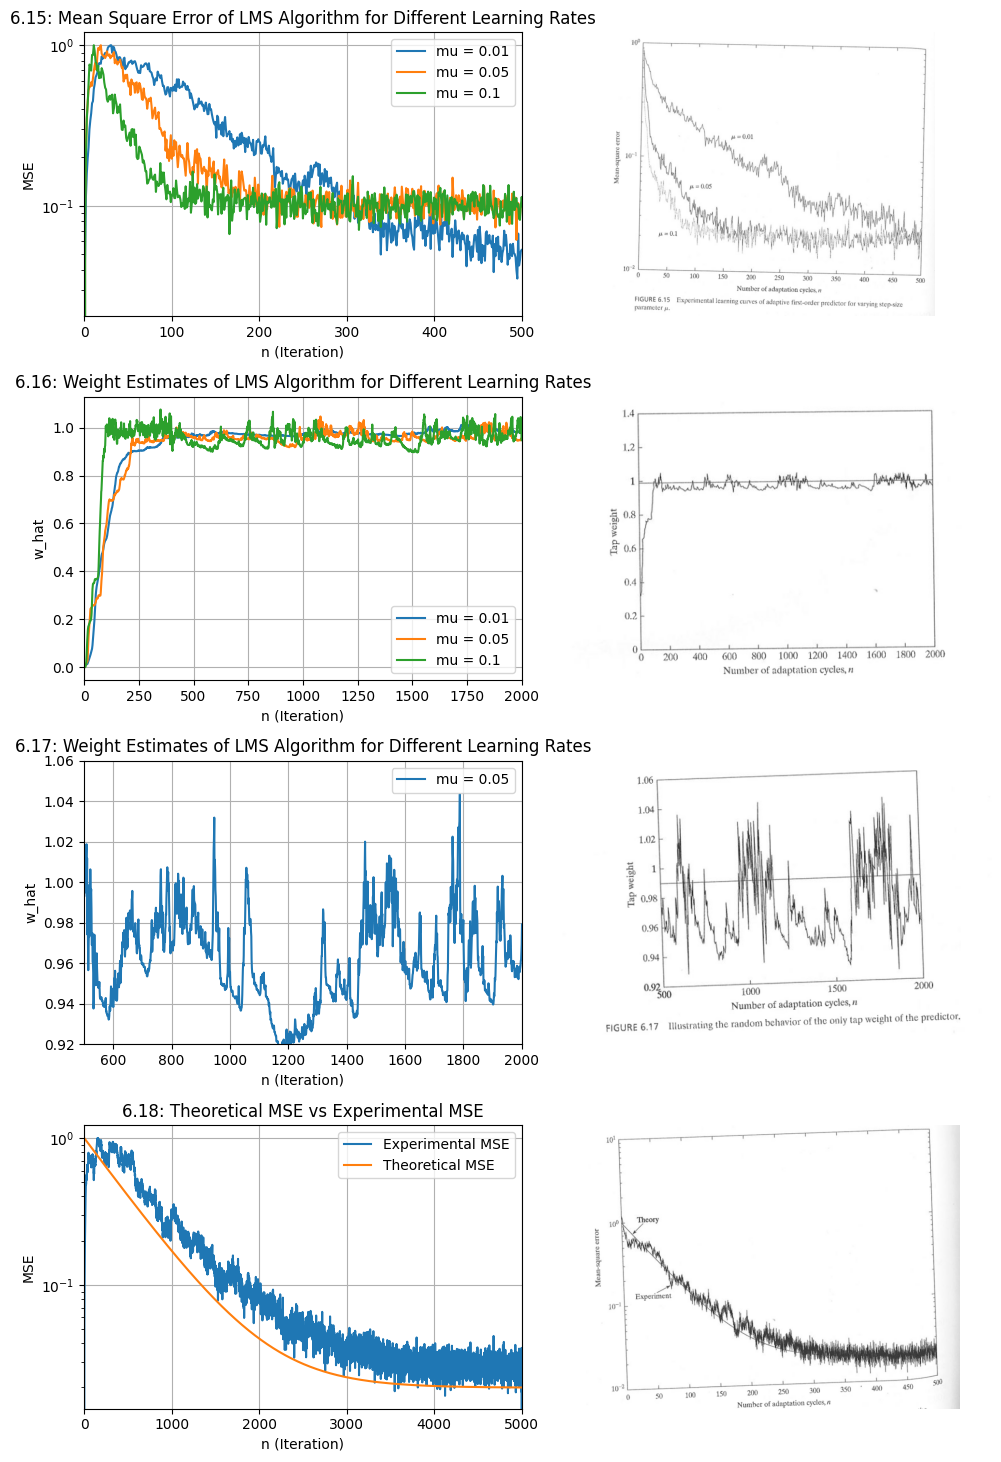

In [53]:
# generate all the necessary data for the plots
# the plots themselves will select the right data.
mu_values = [0.01, 0.05, 0.1, 0.001]
mse_all_runs = [[] for _ in range(len(mu_values))]
w_hat_all_runs = [[] for _ in range(len(mu_values))]
w_hat_last_run = [[] for _ in range(len(mu_values))]
for _ in range(num_simulations):
    for (i, mu) in enumerate(mu_values):
        mse, w_hat_n = lms_algorithm(mu, num_samples)
        mse_all_runs[i].append(mse)
        w_hat_all_runs[i].append(w_hat_n)
        w_hat_last_run[i] = w_hat_n

# Plot all four in the same chart
fig, axs = plt.subplots(4, 2, figsize=(10, 16))

# plot 6.15: Mean Square Error of LMS Algorithm for Different Learning Rates
for i, mu in enumerate(mu_values):
    if i == 3:
        continue
    average_mse = np.mean(mse_all_runs[i], axis=0)
    average_mse = average_mse / np.max(average_mse)  # Normalize experimental MSE
    axs[0,0].plot(average_mse, label=f'mu = {mu}')

# select the data for the 6.16, 6.17 and 6.18 plots
for i, mu in enumerate(mu_values):    
    if i == 3:
        continue
    # select the data for the 6.16 plot
    axs[1,0].plot(w_hat_all_runs[i][0], label=f'mu = {mu}')
    average_w_hat = np.mean(w_hat_all_runs[i], axis=0)

    # select data for the 6.18 plot 
    if i == 1:
        axs[2,0].plot(w_hat_last_run[i], label=f'mu = {mu}')

# 6.18 theoretical MSE
mu_index = mu_values.index(0.001)

average_mse = np.mean(mse_all_runs[mu_index], axis=0)
average_mse = average_mse / np.max(average_mse)  # Normalize experimental MSE

theoretical_mse_history = theorethical_mse(0.001, a, variance, 5000)
theoretical_mse_history = theoretical_mse_history / np.max(theoretical_mse_history)  # Normalize theoretical MSE in the same way

# plot 6.15: Mean Square Error of LMS Algorithm for Different Learning Rates
axs[0,0].set_xlim(0, 500)
axs[0,0].set_xlabel('n (Iteration)')
axs[0,0].set_ylabel('MSE')
axs[0,0].set_yscale('log')
axs[0,0].legend()
axs[0,0].grid(True)
axs[0,0].set_title('6.15: Mean Square Error of LMS Algorithm for Different Learning Rates')

# plot 6.16: w_hat_history
axs[1,0].set_xlim(0, 2000)
axs[1,0].set_xlabel('n (Iteration)')
axs[1,0].set_ylabel('w_hat')
axs[1,0].legend()
axs[1,0].grid(True)
axs[1,0].set_title('6.16: Weight Estimates of LMS Algorithm for Different Learning Rates')

#plot 6.17: w_hat_history for a single run of one of the learning rates
# zoom in further to see the convergence
axs[2,0].set_xlim(500, 2000)
axs[2,0].set_ylim(0.92, 1.06)
axs[2,0].set_xlabel('n (Iteration)')
axs[2,0].set_ylabel('w_hat')
axs[2,0].legend()
axs[2,0].grid(True)
axs[2,0].set_title('6.17: Weight Estimates of LMS Algorithm for Different Learning Rates')

# plot 6.18: Theoretical MSE vs Experimental MSE
axs[3,0].plot(average_mse, label='Experimental MSE')
axs[3,0].plot(theoretical_mse_history, label='Theoretical MSE')
axs[3,0].set_xlim(0, 5000)
axs[3,0].set_xlabel('n (Iteration)')
axs[3,0].set_ylabel('MSE')
axs[3,0].set_yscale('log')
axs[3,0].legend()
axs[3,0].grid(True)
axs[3,0].set_title('6.18: Theoretical MSE vs Experimental MSE')


img = mpimg.imread('6.15.png')
axs[0,1].imshow(img)
axs[0,1].axis('off')

img = mpimg.imread('6.16.png')
axs[1,1].imshow(img)
axs[1,1].axis('off')


img = mpimg.imread('6.17.png')
axs[2,1].imshow(img)
axs[2,1].axis('off')

img = mpimg.imread('6.18.png')
axs[3,1].imshow(img)
axs[3,1].axis('off')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
